##  Implementation

### ```Libraries```

In [1]:
import numpy as np

from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

### ```Architecture```

```Helper Function```

$ a = [a_{1}, a{2}, a_{3} ... a_{n}] $ \
$ softmax(a_i) = \frac{e^{a_{i}}} {\sum{e^{a_{i}}}}$

In [2]:
def softmax(a):
    # Here a is a vector
    numerator   = np.exp(a) # Broadcasting whole vector
    denominator = np.sum(numerator, axis = 1, keepdims = True)
    
    return numerator/denominator

```Neural Network```
- ```__init__()``` : It is to initialize all the elimentary variables like numbers of features, layers we gonna have and the output size.
- ```forward()``` : This is will calculate z value and activation value for each node of each layer
- ```backward()``` : Calculating Delta -> Gradient and the updating model parameters and then propagating layer in backward direction
- ```Predict()``` : It does same as its name suggests, takes x and forward feed to the network
- ```Summary()``` : It is to summarize the size of parameters

In [3]:
class NeuralNetwork:
    
    def __init__(self, number_of_features, layers, output_size):
        
        np.random.seed(0)
        model = {}
        
        """Randomly Assigning Weights for different layers"""
        
        #----------------------------------------Layer 1--------------------------------------
        model["W1"] = np.random.randn(number_of_features, layers[0]) # n X no_of_neurons_in_layer_1
        model["b1"] = np.zeros((1, layers[0])) # 1 X no_of_neurons_in_layer_1
        
        #----------------------------------------Layer 2--------------------------------------
        model["W2"] = np.random.randn(layers[0], layers[1]) # n X no_of_neurons_in_layer_2
        model["b2"] = np.random.randn(1, layers[1]) # 1 X no_of_neurons_in_layer_2
        
        #----------------------------------------Layer 3--------------------------------------
        model["W3"] = np.random.randn(layers[1], output_size) # n X no_of_neurons_in_layer_3
        model["b3"] = np.random.randn(1, output_size) # 1 X no_of_neurons_in_layer_2
        
        
        self.model = model
        self.activation_outputs = None
        
   

    def Forward(self, x):
        
        # Unpacking
        W1, W2, W3 = self.model["W1"], self.model["W2"], self.model["W3"]
        b1, b2, b3 = self.model["b1"], self.model["b2"], self.model["b3"]
        
        
        # For Layer 1
        z1 = np.dot(x, W1) + b1
        a1 = np.tanh(z1) # We are using tanh as an activation function
        
        # For Layer 2
        z2 = np.dot(a1, W2) + b2
        a2 = np.tanh(z2)
        
        # For Layer 3
        z3 = np.dot(a2, W3) + b3
        y_predict = softmax(z3)
        
        
        # Store each activation value
        self.activation_history = (a1, a2, y_predict)
        
        return y_predict
        
    
    def Backward(self, x, y, Lr = 0.001, ):
        
        # Unpacking
        W1, W2, W3 = self.model["W1"], self.model["W2"], self.model["W3"]
        b1, b2, b3 = self.model["b1"], self.model["b2"], self.model["b3"]
        m = x.shape[0]
        a1, a2, y_predict = self.activation_history
        
        # Delta for output layer 
        delta3 = y_predict - y
        
        # Gradient for output layer
        dw3 = np.dot(a2.T, delta3)
        db3 = np.sum(delta3, axis = 0)
        
        
        # Delta for second layer
        delta2 = (1 - np.square(a2)) * np.dot(delta3, W3.T)
        
        # Gradient for second layer
        dw2 = np.dot(a1.T, delta2)
        db2 = np.sum(delta2, axis = 0)
        
        
        # Delta for first layer
        delta1 = (1 - np.square(a1)) * np.dot(delta2, W2.T)
        
        # Gradient for second layer
        dw1 = np.dot(x.T, delta1)
        db1 = np.sum(delta1, axis = 0)
        
        
        ## Update MODEL PARAMETERS --->
        self.model["W1"] -= Lr * dw1
        self.model["b1"] -= Lr * db1
        
        self.model["W2"] -= Lr * dw2
        self.model["b2"] -= Lr * db2
        
        self.model["W3"] -= Lr * dw3
        self.model["b3"] -= Lr * db3
        
        
    
    def Predict(self, x):
        
        y_out = self.Forward(x)# Forward feed to the network
        
        return np.argmax(y_out, axis = 1) # Returning the index with maximum probability
    
    def Summary(self):
        
        # Unpacking every parameter
        W1, W2, W3 = self.model["W1"], self.model["W2"], self.model["W3"]
        a1, a2, y= self.activation_history
        
        print("W1 :", W1.shape)
        print("a1 :", a1.shape)
        
        print("W2 :", W2.shape)
        print("a2 :", a2.shape)
        
        print("W3 :", W3.shape)
        print("y:"  , y.shape)
        

```y_oht``` is different from ```y```\
suppose you have 3 classes with you ```cat``` and ```dog```\
$\begin{bmatrix} 
cat \\
dog\\
human\\
\end{bmatrix} = \begin{bmatrix} 
                0\\
                1\\
                2\\
                \end{bmatrix}$
                
Here ```y``` stands for ```prediction```. So, it could be like this:
$\begin{bmatrix} 
0.1 & 0.7 & 0.2 \\
0.05 & 0.85 & 0.1\\
0.9 & 0 & 0.1 \\
\end{bmatrix}
$\
Now instead of representing probabilities, lets denote class here
$\begin{bmatrix} 
dog\\
dog\\
cat\\
\end{bmatrix}$\
And this is how ```y_oht``` looks like 
$\begin{bmatrix} 
cat & dog & human \\
0 & 1 & 0\\
0 & 1 & 0 \\
1 & 0 & 0 \\
\end{bmatrix}$

In [4]:
def one_hot(y, depth):
    
    m = y.shape[0]
    
    y_oht = np.zeros((m, depth))
    y_oht[np.arange(m), y] = 1
    
    return y_oht

In [5]:
def Loss(y_oht, prob):
    loss = -np.mean(y_oht * np.log(prob))
    return loss

### ```Model Parameters```

In [6]:
number_of_features = 2
layers = [10, 5] 
output_size = 2

### ``` Data Preparation ```

In [7]:
X, Y = make_circles(n_samples = 500, shuffle = True, noise = 0.2, random_state = 1, factor = 0.2)

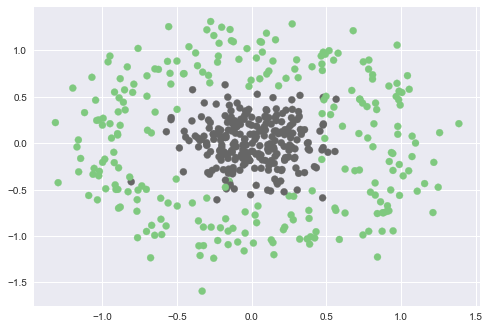

In [8]:
plt.style.use("seaborn")
plt.scatter(X[:, 0], X[:, 1], c = Y, cmap = plt.cm.Accent)
plt.show()

In [9]:
model = NeuralNetwork(number_of_features = number_of_features, layers = layers, output_size = output_size)

In [10]:
def Train(X, Y, model, epochs, Lr, logs = True):
    
    training_loss = []
    classes = 2
    
    Y_oht = one_hot(Y, classes)
    
    for ix in range(epochs):
        
        y = model.Forward(X)
        l = Loss(Y_oht, y)
        training_loss.append(l)
        model.Backward(X, Y_oht, Lr)
        
        if logs:
            #print("Epoch {} Loss {}".format(ix, l))
            pass
            
        
    return training_loss
            

In [11]:
training_loss = Train(X, Y, model, 500, 0.001)

```Insights```

In [12]:
y_predicted = model.Predict(X)

In [13]:
print("Total number of missclassifications : ", np.sum(y_predicted != Y))

Total number of missclassifications :  16


### ``` Data Visualization```

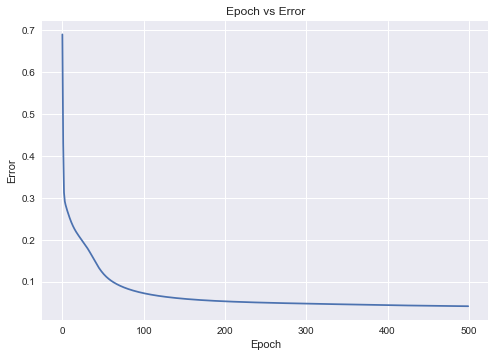

In [14]:
plt.plot(training_loss)
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.title("Epoch vs Error")
plt.show()

``` Lets see what our model classify data ```

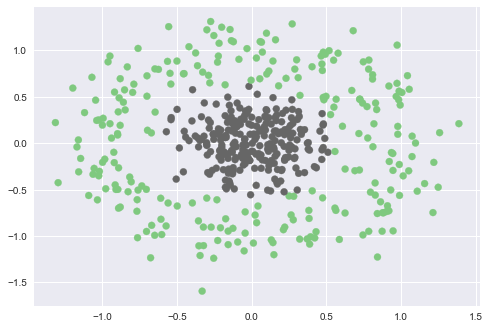

In [15]:
plt.scatter(X[:, 0], X[:, 1], c = y_predicted, cmap = plt.cm.Accent)
plt.show()

### ```Visualizing Decision Boundary```

In [16]:
from visualize import plot_decision_boundary

Actual Data 

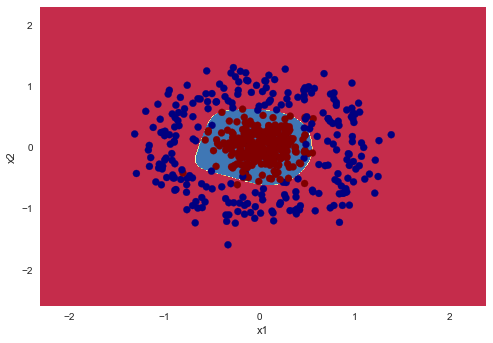

In [17]:
plot_decision_boundary(lambda x : model.Predict(x), X, Y)

Predicted One

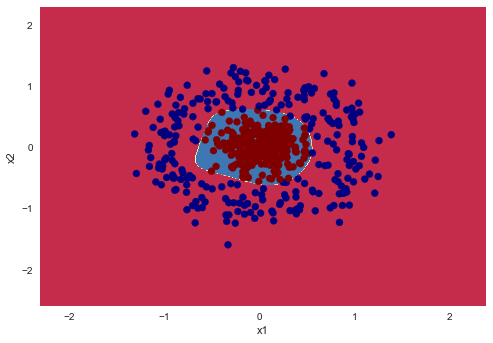

In [18]:
plot_decision_boundary(lambda x : model.Predict(x), X, y_predicted)

### ```Accuracy```

In [19]:
missclassify = np.sum(y_predicted == Y)

In [20]:
score = (missclassify/X.shape[0]) * 100
print(score)

96.8
